In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load & check the data
MNIST_HoYin = fetch_openml('mnist_784', version=1)
print("Keys:", MNIST_HoYin.keys())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Keys: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


Type of X: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>
Shape of X: (70000, 784)
Shape of y: (70000,)


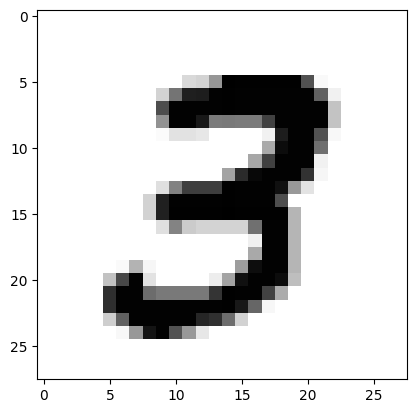

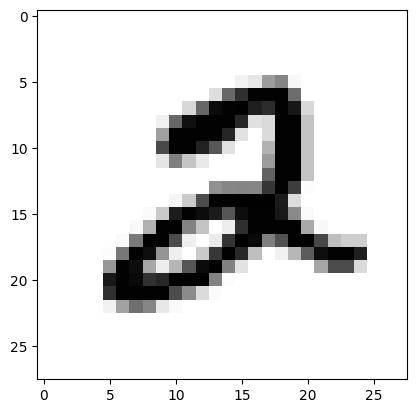

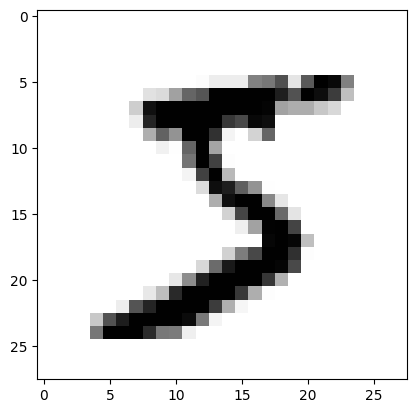

In [2]:
X_HoYin, y_HoYin = MNIST_HoYin["data"], MNIST_HoYin["target"]
print("Type of X:", type(X_HoYin))
print("Type of y:", type(y_HoYin))
print("Shape of X:", X_HoYin.shape)
print("Shape of y:", y_HoYin.shape)
some_digit1 = X_HoYin.loc[7].values
some_digit2 = X_HoYin.loc[5].values
some_digit3 = X_HoYin.loc[0].values
some_digit1_image = some_digit1.reshape(28, 28)
some_digit2_image = some_digit2.reshape(28, 28)
some_digit3_image = some_digit3.reshape(28, 28)
plt.imshow(some_digit1_image, cmap=mpl.cm.binary)
plt.show()
plt.imshow(some_digit2_image, cmap=mpl.cm.binary)
plt.show()
plt.imshow(some_digit3_image, cmap=mpl.cm.binary)
plt.show()

{1: 20013, 0: 28911, 9: 21076}


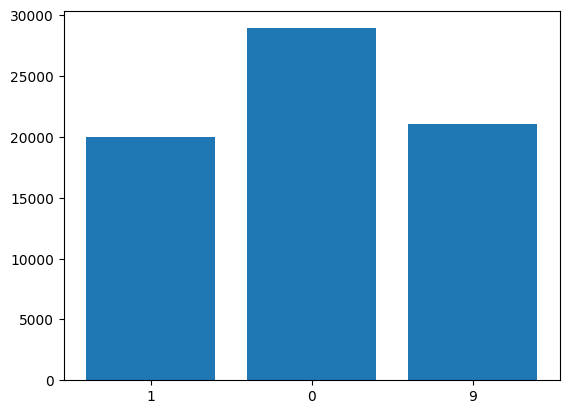

In [3]:
# Pre-process the data 
y_HoYin = y_HoYin.astype(np.uint8)
classes = np.where(y_HoYin < 4, 0, (np.where(y_HoYin > 6, 9, 1)))
freq = {}
for i in range(len(classes)):
  if classes[i] in freq.keys():
    freq[classes[i]] += 1
  else:
    freq[classes[i]] = 1

print(freq)
keys = list(freq.keys())
ls = []
for i in keys:
  ls.append(str(i))
plt.bar(ls, freq.values())
plt.show()
X_HoYin_train, X_HoYin_test, y_HoYin_train, y_HoYin_test = X_HoYin[:50000], X_HoYin[50000:], y_HoYin[:50000], y_HoYin[50000:]

In [4]:
# Bulid Claasification Models
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

NB_clf_HoYin = MultinomialNB()
NB_clf_HoYin.fit(X_HoYin_train, y_HoYin_train)
NB_clf_HoYin_score = cross_val_score(NB_clf_HoYin, X_HoYin_train, y_HoYin_train, cv=3, scoring="accuracy")
print(NB_clf_HoYin_score)

NB_clf_HoYin_test_score = NB_clf_HoYin.score(X_HoYin_test,y_HoYin_test)
print(NB_clf_HoYin_test_score)

y_HoYin_train_pred = cross_val_predict(NB_clf_HoYin, X_HoYin_train, y_HoYin_train, cv=3)
NB_confusion_matrix = confusion_matrix(y_HoYin_train, y_HoYin_train_pred)
print(NB_confusion_matrix)
some_digit1_pred = NB_clf_HoYin.predict([some_digit1])
print(some_digit1_pred)
some_digit2_pred = NB_clf_HoYin.predict([some_digit2])
print(some_digit2_pred)
some_digit3_pred = NB_clf_HoYin.predict([some_digit3])
print(some_digit3_pred)

[0.81832363 0.81286374 0.82713309]
0.84065
[[4464    4   30   17    9   70   89    0  246    3]
 [   0 5294   40   37    5   28   28    4  223   19]
 [  69   67 4087  115   55    6  246   36  272   15]
 [  26  103  239 4113   12  103   53   44  236  172]
 [  16   12   34    3 3571   12  117   11  204  879]
 [ 139   42   43  557   93 2910  109   11  439  163]
 [  53   96   67    3   30  124 4514    0   63    1]
 [  27   76   40   18  132    1    7 4239  167  468]
 [  31  291   79  268   68  180   41   11 3676  197]
 [  37   37   17   61  361   19    3  152  197 4104]]
[3]
[2]
[5]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [5]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

LR_clf_HoYin_lbfgs = LogisticRegression(solver="lbfgs", multi_class="multinomial", max_iter=1200, tol=0.1)
LR_clf_HoYin_lbfgs.fit(X_HoYin, y_HoYin)

LR_clf_HoYin_saga = LogisticRegression(solver="saga", multi_class="multinomial", max_iter=1200, tol=0.1)
LR_clf_HoYin_saga.fit(X_HoYin, y_HoYin)

lbfgs_score = cross_val_score(LR_clf_HoYin_lbfgs, X_HoYin_train, y_HoYin_train, cv=3, scoring="accuracy")
print(lbfgs_score)
saga_score = cross_val_score(LR_clf_HoYin_saga, X_HoYin_train, y_HoYin_train, cv=3, scoring="accuracy")
print(saga_score)

lbfgs_test_score = LR_clf_HoYin_lbfgs.score(X_HoYin_test,y_HoYin_test)
print(lbfgs_test_score)
saga_test_score = LR_clf_HoYin_saga.score(X_HoYin_test,y_HoYin_test)
print(saga_test_score)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[0.89284214 0.89608208 0.89043562]
[0.91648167 0.91588168 0.91185647]
0.9462
0.9338


In [8]:
y_HoYin_train_lbfgs_pred = cross_val_predict(LR_clf_HoYin_lbfgs, X_HoYin_train, y_HoYin_train, cv=3)
y_HoYin_train_saga_pred = cross_val_predict(LR_clf_HoYin_saga, X_HoYin_train, y_HoYin_train, cv=3)

lbfgs_confusion_matrix = confusion_matrix(y_HoYin_train, y_HoYin_train_lbfgs_pred)
print(lbfgs_confusion_matrix)
saga_confusion_matrix = confusion_matrix(y_HoYin_train, y_HoYin_train_saga_pred)
print(saga_confusion_matrix)

lbfgs_precision_score = precision_score(y_HoYin_train, y_HoYin_train_lbfgs_pred, average='macro')
print(lbfgs_precision_score)
lbfgs_recall_score = recall_score(y_HoYin_train, y_HoYin_train_lbfgs_pred, average='macro')
print(lbfgs_recall_score)
saga_precision_score = precision_score(y_HoYin_train, y_HoYin_train_saga_pred, average='macro')
print(saga_precision_score)
saga_recall_score = recall_score(y_HoYin_train, y_HoYin_train_saga_pred, average='macro')
print(saga_recall_score)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[[4673    0   44   14   18   60   53    8   49   13]
 [   3 5437   46   38   10   26    7   14   90    7]
 [  61   97 4272  120   70   30   95   68  119   36]
 [  33   34  172 4381   17  178   26   73  130   57]
 [  24   26   49   12 4359   22   64   43   49  211]
 [  76   33   48  164   78 3735  110   18  182   62]
 [  53   19   57    9   72   82 4614    5   38    2]
 [  16   24   61   41   81   10    7 4692   31  212]
 [  46  102  101  137   33  174   53   18 4098   80]
 [  23   21   19   71  157   46    3  195   58 4395]]
[[4751    1   28    8   13   44   31   10   40    6]
 [   1 5514   26   22    5   22    5   12   59   12]
 [  35   53 4418   90   67   20   70   64  125   26]
 [  13   22  127 4519    8  180   20   60   99   53]
 [  12   19   28    7 4507    5   54   17   30  180]
 [  65   24   33  156   54 3853   82   17  165   57]
 [  32   14   40    1   46   63 4715    5   33    2]
 [  16   31   62   21   47    8    3 4778   17  192]
 [  30   94   61  125   24  144   44   15 423

In [7]:
lbfgs_pred1 = LR_clf_HoYin_lbfgs.predict([some_digit1])
print(lbfgs_pred1)
lbfgs_pred2 = LR_clf_HoYin_lbfgs.predict([some_digit2])
print(lbfgs_pred2)
lbfgs_pred3 = LR_clf_HoYin_lbfgs.predict([some_digit3])
print(lbfgs_pred3)

saga_pred1 = LR_clf_HoYin_saga.predict([some_digit1])
print(saga_pred1)
saga_pred2 = LR_clf_HoYin_saga.predict([some_digit2])
print(saga_pred2)
saga_pred3 = LR_clf_HoYin_saga.predict([some_digit3])
print(saga_pred3)

[3]
[2]
[5]
[3]
[2]
[5]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X 